# Practice Session 07: Network models


In this session we will learn to use [NetworkX](https://networkx.github.io/), a Python package, and we will write code to create random graphs and preferential attachment graphs.

**Note:** The graph generators we ask you to delive for this practice are already implemented in the NetworkX library and in other places online. *Do not copy those implementations:* they reproduce the same kinds of graph but follow a design that is different from what we describe here.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Josip Hanak</font>

E-mail: <font color="blue">josip.hanak@fer.hr</font>

Date: <font color="blue">4/11/2022</font>

# 1. Random (ER) graph generator

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

The following function, which you can leave as-is, will be useful. It returns `True` with probability *p*, and `False` with probability *1-p*:

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [8]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

<font size="+1" color="red">Replace this cell with your code for *generate_random_graph(N,p)*, include comments to explain what you are doing at each step.</font>

In [9]:
def generate_random_graph(N, p):
    
    NODE_NUMBER, PROBABILITY = N, p
    
    #initializes empty ER graph
    ERgraph = nx.Graph()
    #add desired number of nodes into graph
    for i in range(0,N):
        ERgraph.add_node(i)
    #iterate through all pairs of nodes
    for u, v in itertools.combinations(ERgraph.nodes, 2):
        #if the experiment for the given probability is true connect the edges
        if flip_coin(PROBABILITY):
            ERgraph.add_edge(u, v)
    # return graph
    return ERgraph  

The following code, which you should leave as-is, tests your generator in terms of the number of nodes and number of edges generated.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [10]:
# Leave as-is

trials = 1000
N = 200
p = 0.65

generated_edges = []
for i in range(trials):
    g = generate_random_graph(N, p)
    generated_edges.append(g.number_of_edges())
    assert g.number_of_nodes() == N, "Incorrect number of nodes"
    
print("Average number of edges after %d trials: observed=%.2f, expected=%.2f" % (trials, np.average(generated_edges), p*N*(N-1)/2) )

Average number of edges after 1000 trials: observed=12938.32, expected=12935.00


Create a new generator, `generate_random_graph_avg_degree(N, kavg)` that given a target number of nodes, and a target average degree, determines the appropriate value of `p` to call `generate_random_graph(N, p)`, using the formulas seen in class.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [11]:
def generate_random_graph_avg_degree(N, kavg):
    target_number = N
    target_average_degree = kavg
    #formula used in theory class
    p = float(target_average_degree)/float(N-1)
    #create new graph using preveously made function and return the result
    return generate_random_graph(target_number, p)

The following code, which you should leave as-is, tests your new generator. The observed average degree should be close to the target average degree.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [12]:
# Leave as-is

N = 1500
target_average_degrees = np.arange(0.0, 2.0, 0.1)

for kavg in target_average_degrees:
    g = generate_random_graph_avg_degree(N, kavg)
    kavg_observed = np.average([g.degree(u) for u in g.nodes()])
    print("Average degree: target=%.3f, observed=%.3f" % (kavg, kavg_observed))

Average degree: target=0.000, observed=0.000
Average degree: target=0.100, observed=0.096
Average degree: target=0.200, observed=0.204
Average degree: target=0.300, observed=0.340
Average degree: target=0.400, observed=0.383
Average degree: target=0.500, observed=0.509
Average degree: target=0.600, observed=0.593
Average degree: target=0.700, observed=0.685
Average degree: target=0.800, observed=0.807
Average degree: target=0.900, observed=0.893
Average degree: target=1.000, observed=0.968
Average degree: target=1.100, observed=1.105
Average degree: target=1.200, observed=1.264
Average degree: target=1.300, observed=1.291
Average degree: target=1.400, observed=1.375
Average degree: target=1.500, observed=1.539
Average degree: target=1.600, observed=1.641
Average degree: target=1.700, observed=1.673
Average degree: target=1.800, observed=1.816
Average degree: target=1.900, observed=1.947


## 1.2. Measure connectivity


<font size="+1" color="red">Replace this cell with your code for *is_connected(g)*, include comments to explain what you are doing at each step.</font>

In [316]:
def is_connected(g):
    for source, target in itertools.combinations(g.nodes, 2):
        if source != target:
            #if there isnt a path immediately return false
            if nx.has_path(g, source, target) == False:
                return False
    #every node has a path return true
    return True

In [317]:
# Leave as-is

def size_largest_cc(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    return G0.number_of_nodes()

In [318]:
#Create a series of ER graphs having N=1000 nodes and target average degree 0.0, 0.1, 0.2, ..., 2.0.
#Record: (1) their observed average degrees and (2) the size of their largest connected component as a fraction of the total number 
#of nodes.

N = 1000
#make an array with step 0.1
target_average_degrees = np.arange(0.0, 2.0, 0.1)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:

    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    #if wrong number of nodes throw error
    assert g.number_of_nodes() == N, "Wrong number of nodes"

    # Obtain observed average degree
    average_degree = np.average([g.degree(u) for u in g.nodes()])
    average_degrees.append(average_degree)

    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = size_largest_cc(g)/N
    largest_cc_sizes.append(largest_cc_size)

<font size="+1" color="red">Replace this cell with your code to create a plot in which in the X axis we have observed average degree and in the Y axis the size of the largest connected component, as a fraction of the number of nodes.</font>

[0.0, 0.098, 0.198, 0.272, 0.384, 0.49, 0.62, 0.682, 0.808, 0.944, 0.942, 1.072, 1.162, 1.266, 1.458, 1.52, 1.518, 1.594, 1.812, 1.944]
[0.001, 0.005, 0.005, 0.007, 0.006, 0.01, 0.02, 0.02, 0.043, 0.076, 0.044, 0.163, 0.106, 0.236, 0.545, 0.59, 0.604, 0.629, 0.739, 0.795]


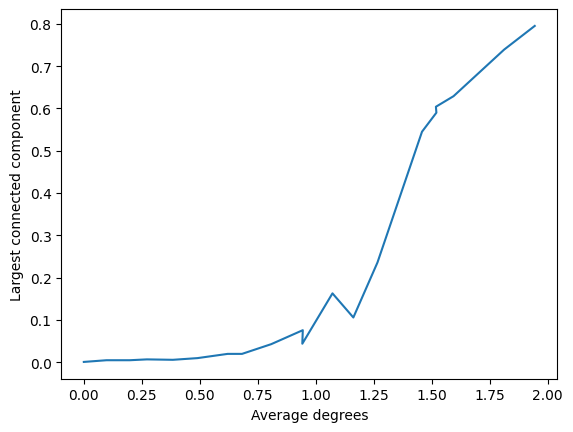

In [319]:
import matplotlib.pyplot as plt
print(average_degrees)
print(largest_cc_sizes)
plt.xlabel("Average degrees")
plt.ylabel("Largest connected component")
x = average_degrees
y = largest_cc_sizes

plt.plot(x,y)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this figure.</font>

In [ ]:
I observe with the increase of average degree that the largest component grows in node size. This is logical
because the higher the average node degree is the more likely it is for them to connect forming larger components.

## 1.3. Visualize graphs and plot degree distributions

<font size="+1" color="red">Replace this cell with your code to generate and visualize 3 ER graphs of about 200 nodes each. **Make sure all the graphs you generate are connected, check them with your is_connected(g) function**</font>

In [324]:
er_graphs = []
flag = True
#initial p
p = 0.05
while flag == True:
    #generate the graph if it is connected add to array
    graph = generate_random_graph(200, p)
    if is_connected(graph) == True:
        er_graphs.append(graph)
        #increase p so the graphs differ
        p=p+0.1
    if len(er_graphs) == 3:
        flag = False
    


In [323]:
#function for drawing the graph
def draw_graph(graph):
    plt.figure(figsize=(12,6))
    plt.axis('off')
    #spring layout
    pos=nx.spring_layout(graph)
    #draw it out
    nx.draw_networkx(graph, pos, with_labels=False, node_size=20, node_color='yellow')

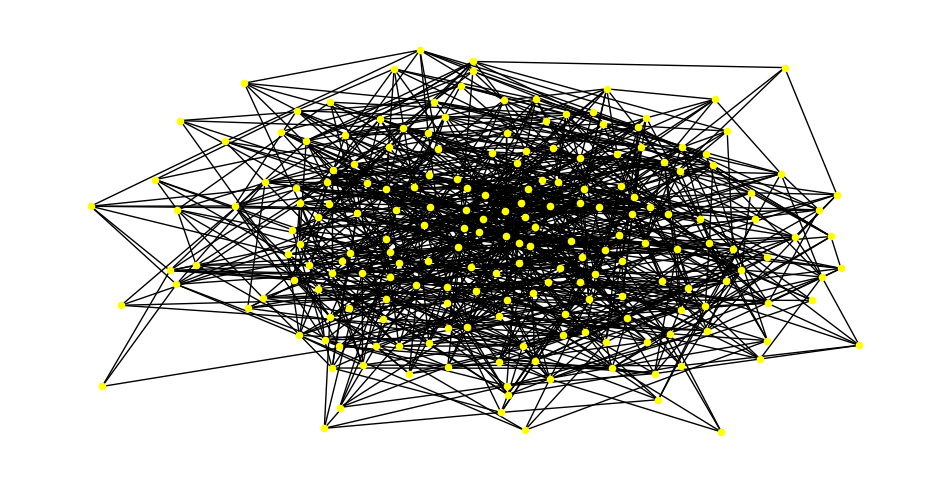

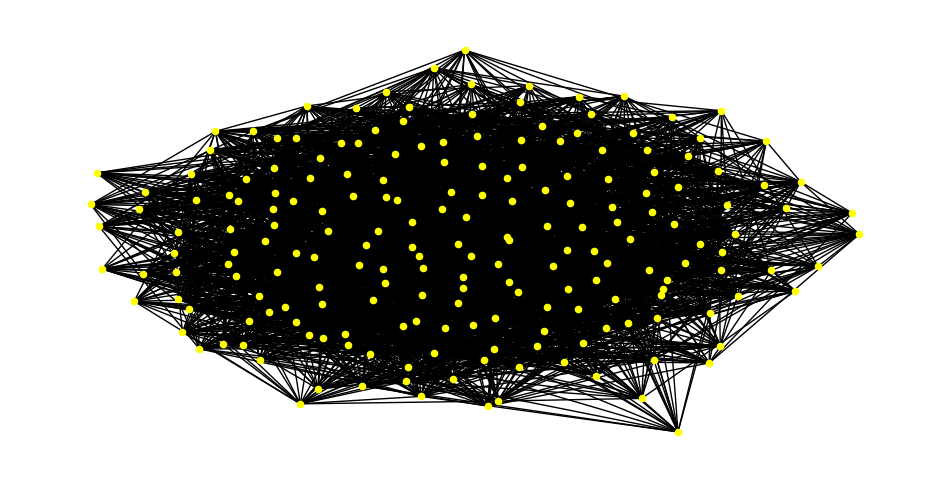

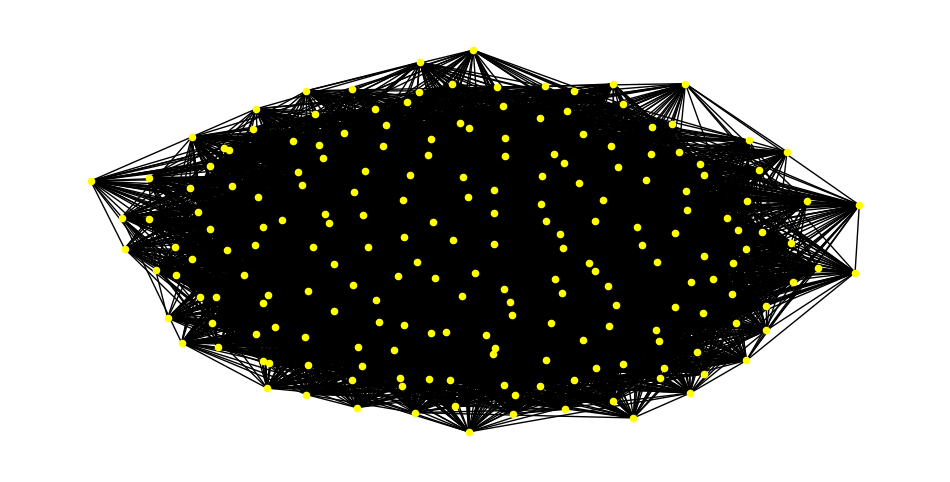

In [325]:

for graph in er_graphs:
    draw_graph(graph)
    
    

<font size="+1" color="red">Replace this cell with your code for print_er_statistics</font>

In [326]:
def print_er_statistics(g,p):
    #take into average every degree of the graph
    kavg_observed = np.average([g.degree(u) for u in g.nodes()])
    #according to the formula in theory class
    kavg_expected = float(p)*float(g.number_of_nodes()-1)
    print("Observed average degree <k>:",kavg_observed,"    Expected average degree: ", kavg_expected)

You can use the following function (as-is, or modified) to plot the degree distribution in a graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [327]:
# Leave as-is or modify if you want

def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()
    

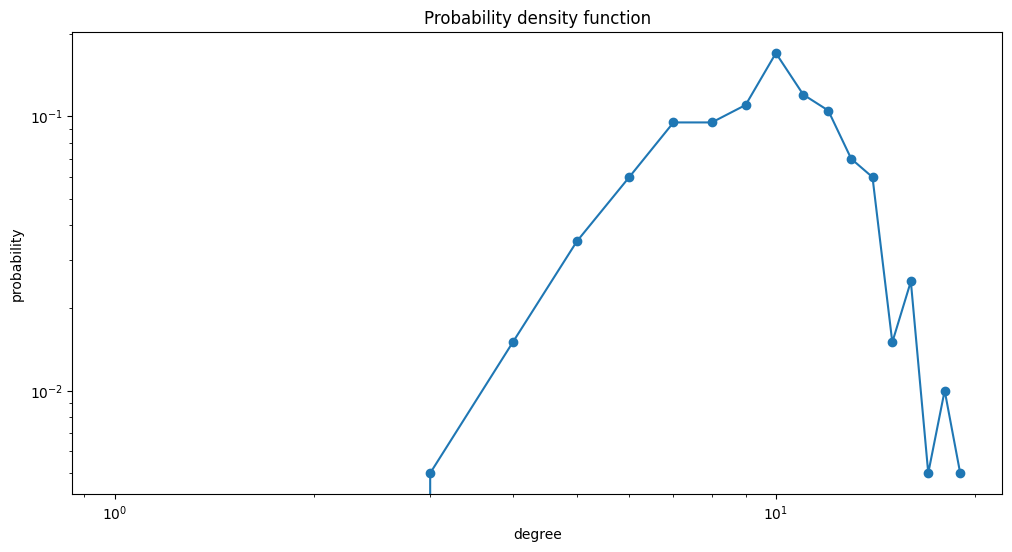

Observed average degree <k>: 10.04     Expected average degree:  9.950000000000001


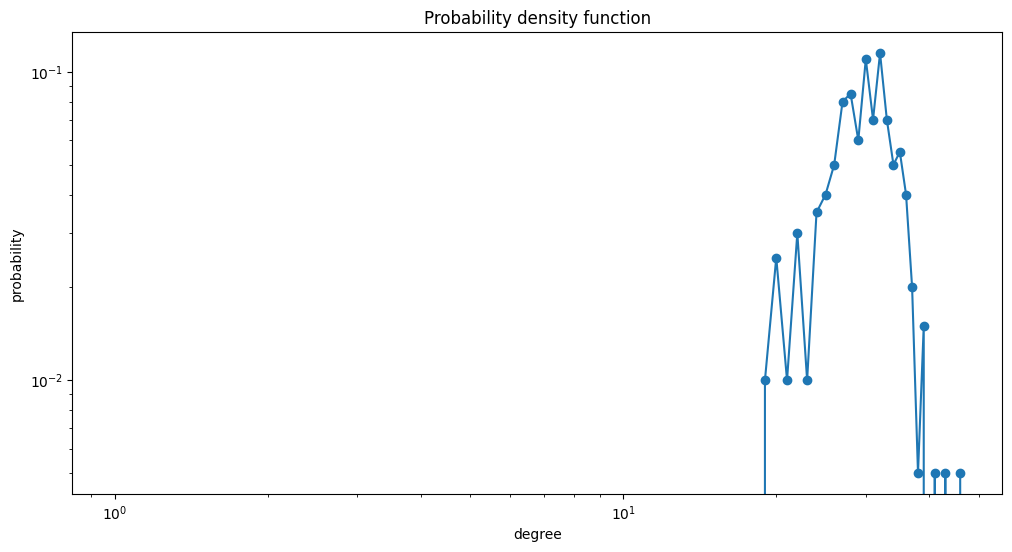

Observed average degree <k>: 29.9     Expected average degree:  29.850000000000005


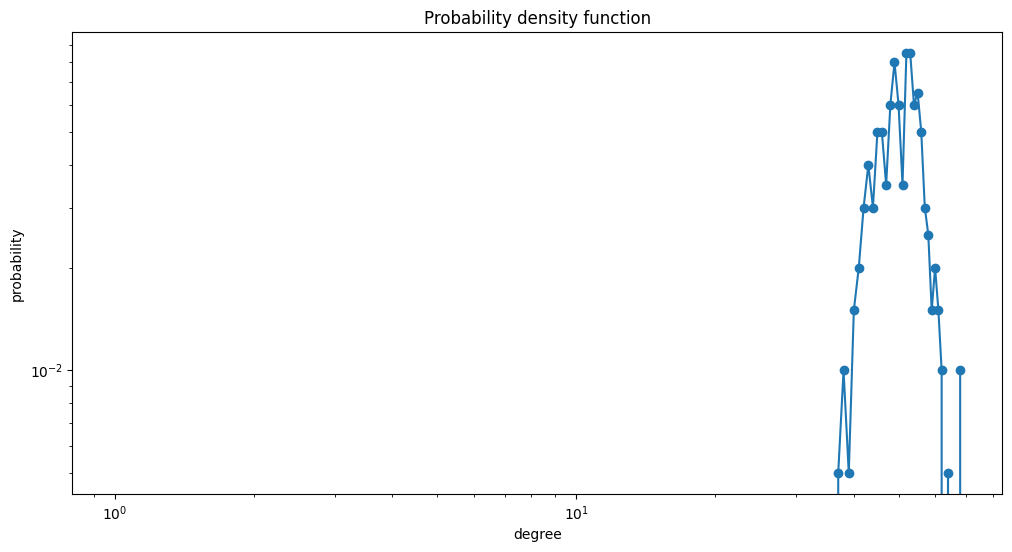

Observed average degree <k>: 50.58     Expected average degree:  49.75


In [328]:
#i know the p values and how they increase so i just replicate
p=0.05
for graph in er_graphs:
    plot_degree_distribution(graph)
    print_er_statistics(graph, p)
    p = p+0.1

<font size="+1" color="red">Replace this cell with five graphs with *N* between 1500 and 3000, and different probabilities *p*. Start with a small probability *p* that yields a sparse graph, and increase it gradually. Not all graphs need to be connected. For each graph, include its drawing, a drawing of its degree distribution using plot_degree_distribution, its average degree, and its expected average degree.</font>

In [342]:
unconnected_er_graphs = []
flag = True
#initial p
p = 0.0005
N = 1500
while flag == True:
    #generate the graph if it is connected add to array
    graph = generate_random_graph(N, p)
    #do not check if it is connected
    #if is_connected(graph) == False:
    unconnected_er_graphs.append(graph)
    #increase p so the graphs differ
    p=p+0.0007
    N = N + 350
    if len(unconnected_er_graphs) == 5:
        flag = False

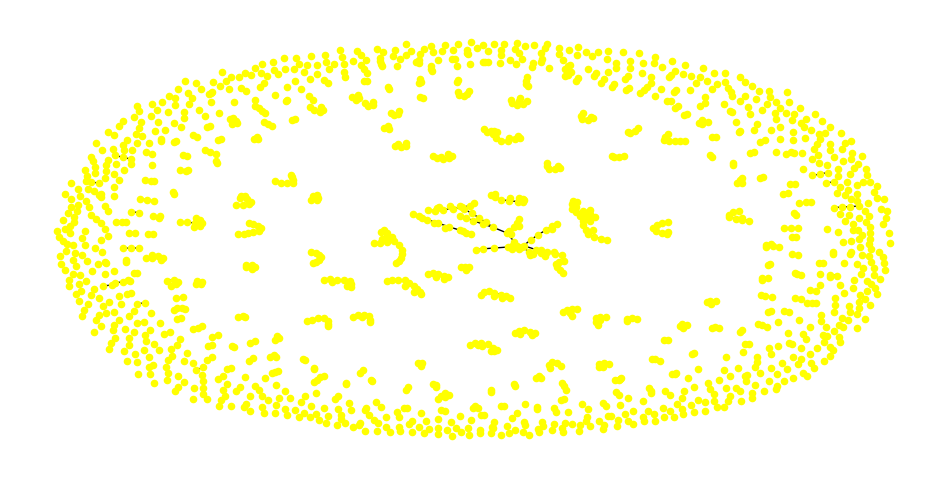

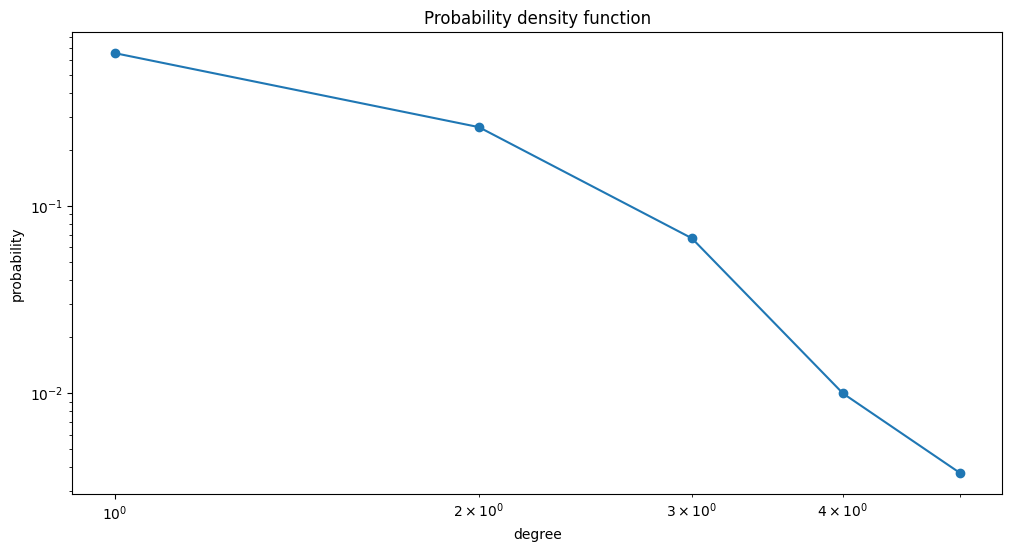

Observed average degree <k>: 0.7733333333333333     Expected average degree:  0.7495
number of nodes   1500   probability   0.0005


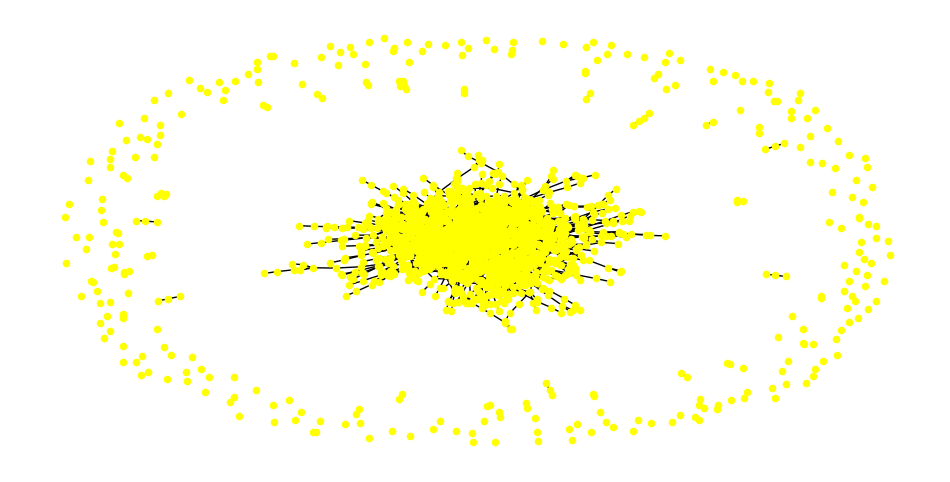

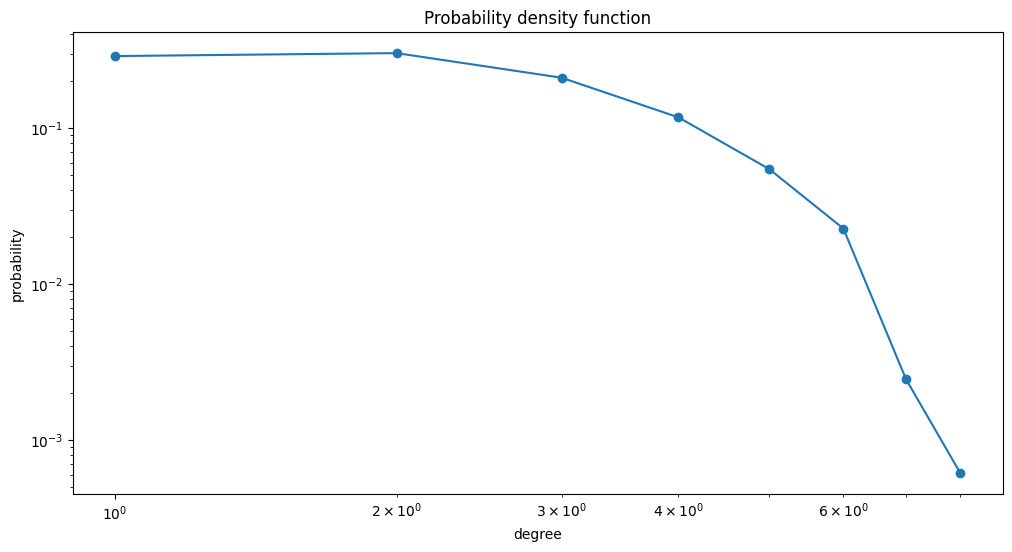

Observed average degree <k>: 2.1372972972972972     Expected average degree:  2.2188000000000003
number of nodes   1850   probability   0.0012000000000000001


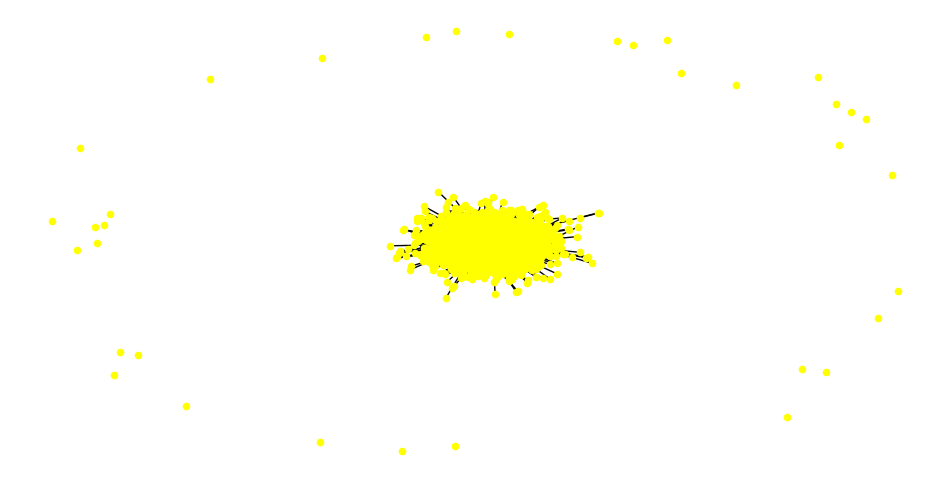

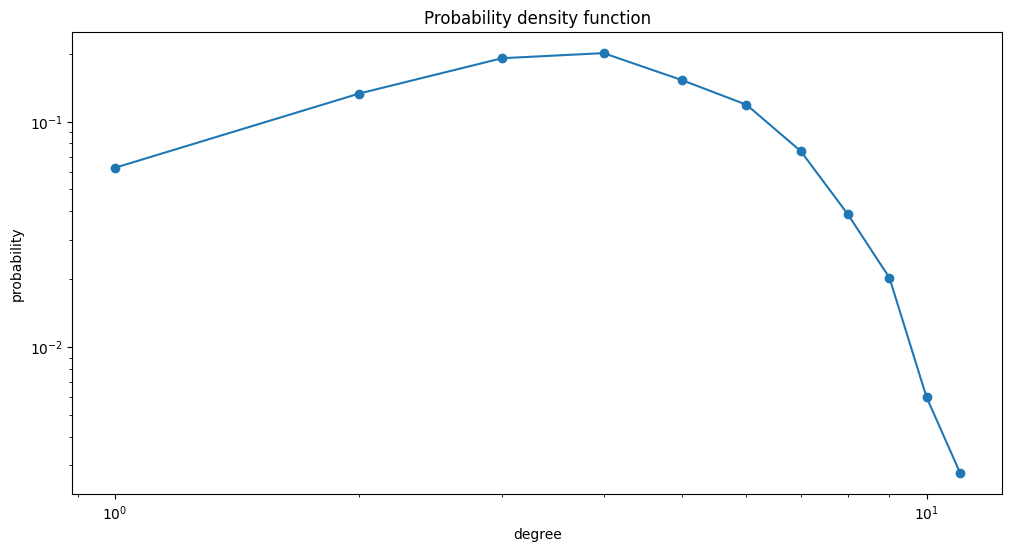

Observed average degree <k>: 4.211818181818182     Expected average degree:  4.178100000000001
number of nodes   2200   probability   0.0019000000000000002


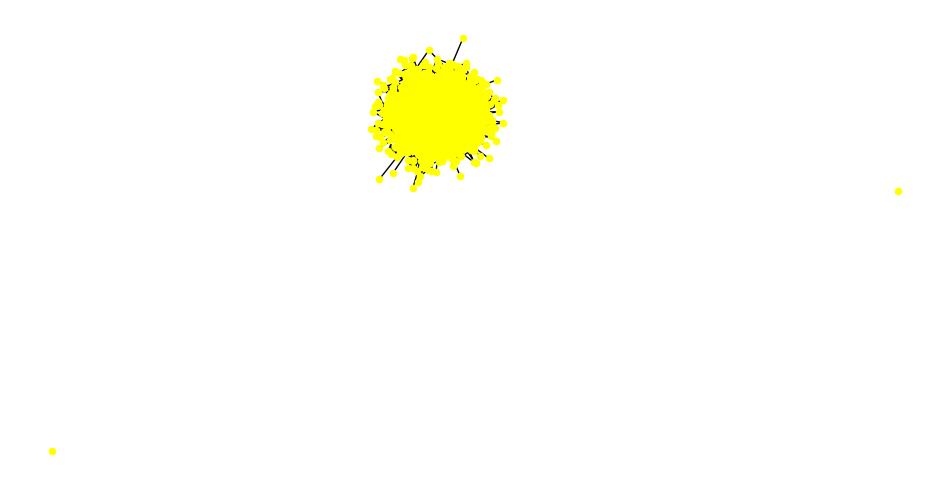

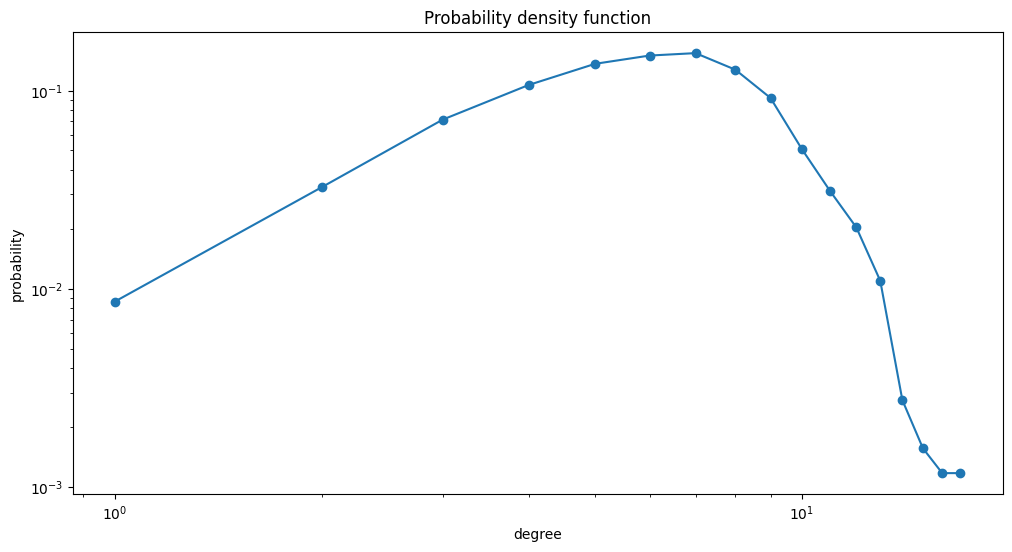

Observed average degree <k>: 6.56     Expected average degree:  6.627400000000001
number of nodes   2550   probability   0.0026000000000000003


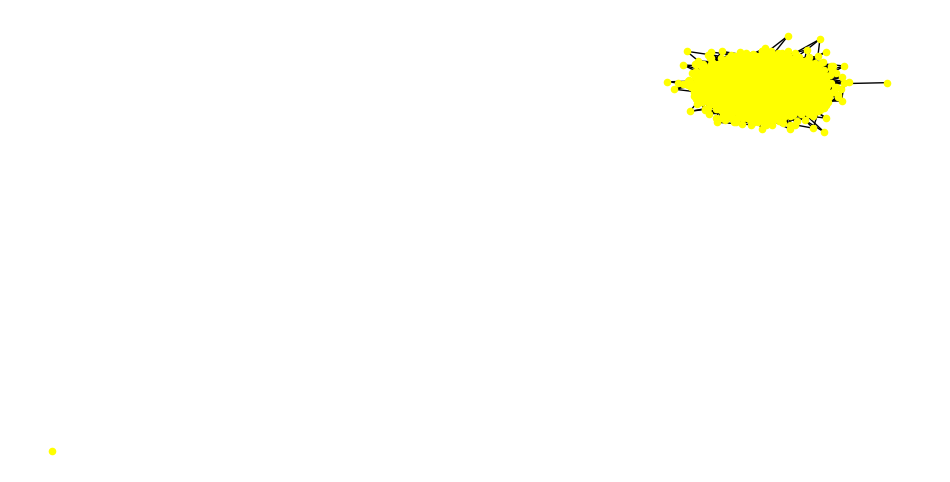

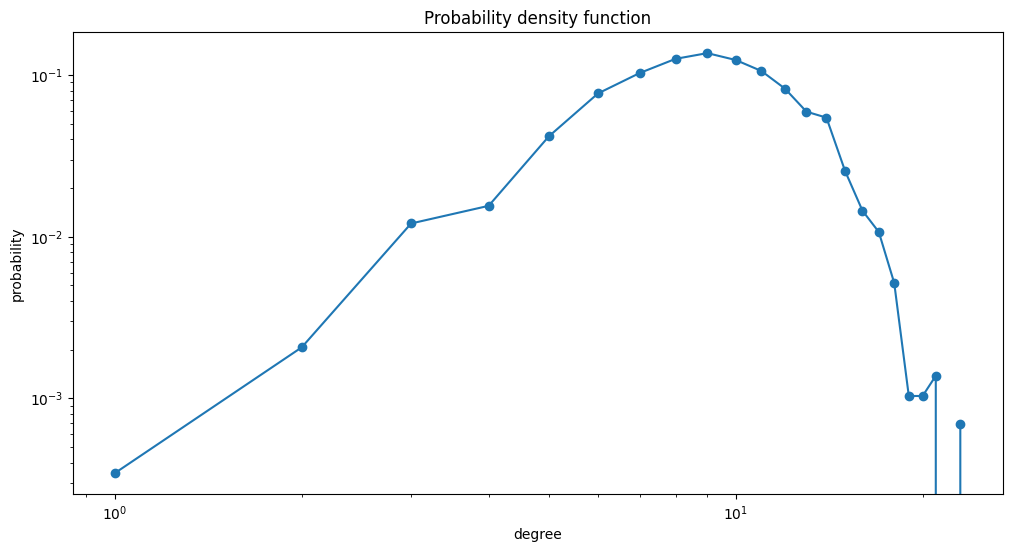

Observed average degree <k>: 9.627586206896552     Expected average degree:  9.5667
number of nodes   2900   probability   0.0033000000000000004


In [346]:
#i know the p values and how they increase so i just replicate
p=0.0005
for graph in unconnected_er_graphs:
    draw_graph(graph)
    plot_degree_distribution(graph)
    print_er_statistics(graph, p)
    print("number of nodes  ",len(graph.nodes()), "  probability  ", p)
    p = p+0.0007

<font size="+1" color="red">Replace this cell with a brief commentary on what you see in the figures above.</font>

In [ ]:
Observing the five graphs which evolve from a almost totally unconnected graph to a connected graph I have observed
that after a critical point in the probability that the graph becomes connected (or almost fully connected) as we
discussed in the class.

# 2. Preferential attachment (BA) generator

Write code for creating a BA graph.

Start by creating an auxiliary function, `select_with_probability(x, m, p)` that selects *m* elements from set *x* according to probabilities in *p*, without replacement. Use `[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)` to do this.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `select_with_probability`.</font>

In [262]:
def select_with_probability(x, m, p):
    x, p = np.array(list(x)), np.array(list(p))
    return_val = np.random.choice(x, m, False, p)
    return return_val



The next cell, which you should leave as-is, allows you to see how your code works.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [265]:
# Leave as-is

trials = 1200
vector = ['a', 'b', 'c']
probabilities = [0.73, 0.15, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)
    
for i, p in zip(vector, probabilities):
    print("Element %s was selected %d times, expected %.1f" % (i, all_selected.count(i), trials*p) )

Element a was selected 883 times, expected 876.0
Element b was selected 160 times, expected 180.0
Element c was selected 157 times, expected 144.0


<font size="+1" color="red">Replace this cell with your implementation of select_targets.</font>


In [347]:
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    sum_degree = sum([g.degree(u) for u in g.nodes()])
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        p = float(degree)/float(sum_degree)
        probabilities.append(p)
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected

<font size="+1" color="red">Replace this cell with your implementation of generate_preferential_attachment_graph(N, m0, m), include comments to explain what you are doing at each step.</font>

In [348]:
def generate_preferential_attachment_graph(N, m0, m):
    #Checks that m <= m0 or raises a ValueError
    if m >= m0:
        raise ValueError("M is smaller than M0")
    #Creates an empty graph
    graph = nx.Graph()
    #Adds nodes numbered from 0 to m0 - 1 to the graph                   
    for i in range(m0-1):
        graph.add_node(i)
    #Creates a cycle by linking node 0 to node 1, node 1 to node 2, ..., node m0-1 to node 0                     
    for i in range(1,m0):
        graph.add_edge(0, i)
    u_list = list()
    #For every node u numbered from m0 to N - 1                     
    for u in range(m0, N-1):
        #u_list.append(graph.nodes[i])
        u_list.append(u)
        #Select m targets for this node using select_targets
        targets = select_targets(graph,m)
        #Add node u (remember to select targets before adding the node u)
        graph.add_node(u)
        #Link each node u to each of the m targets
        #for u in u_list:
        for target in targets:
            graph.add_edge(u, target)
    return graph
    

<font size="+1" color="red">Replace this cell with two preferential attachment (BA) graphs with a few thousand nodes (in the range 1000-3000), and small values of *m0* and *m* (in the range 1-10). For each graph, include their drawing and their degree distribution, in log-log scale, plus a brief commentary of about a paragraph per graph.</font>

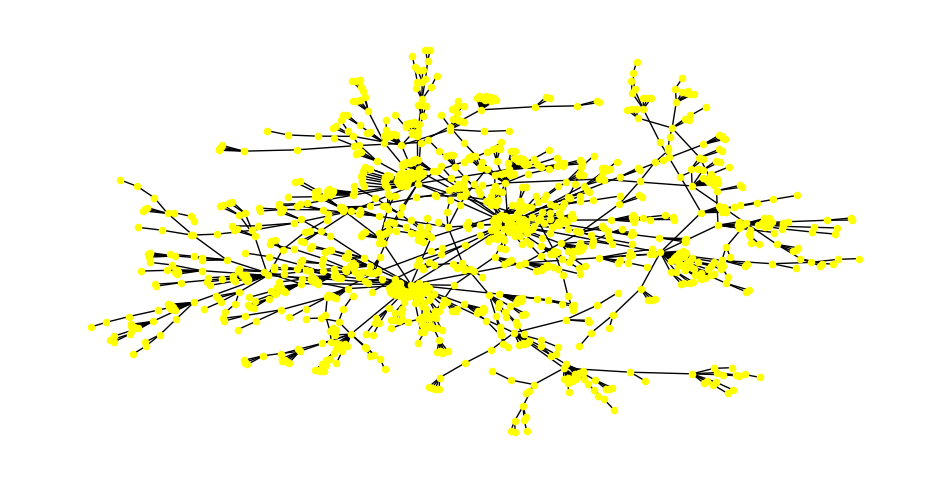

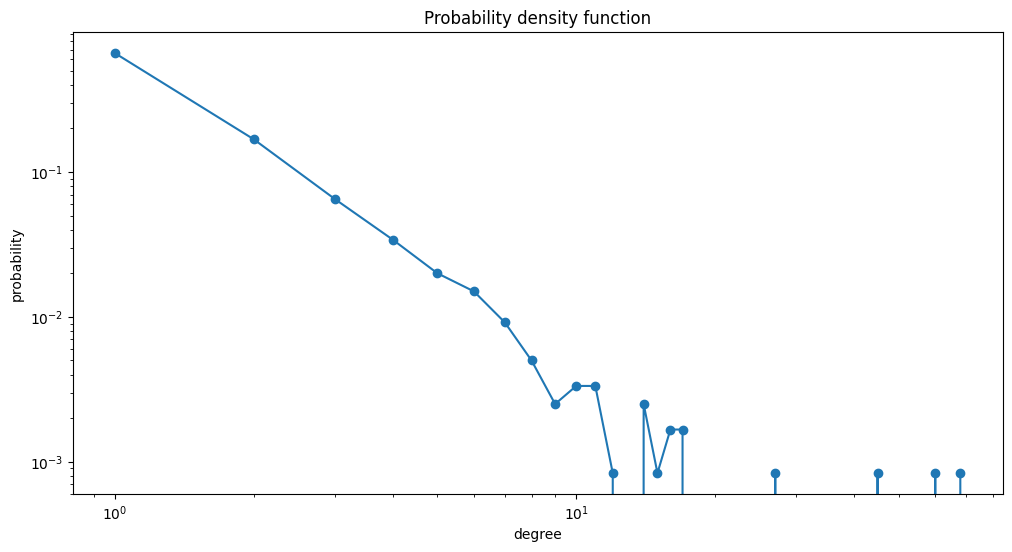

In [369]:
g1 = generate_preferential_attachment_graph(1200, 3, 1)
draw_graph(g1)
plot_degree_distribution(g1)


In [ ]:
The first graph has  much smaller degrees and they are somewhat more evenly spread out, in the graph
this is evident because the graph is more evenly distributed and does not have a central node with a high degree,
which is a consequence of the very small and close arguments m and m0.

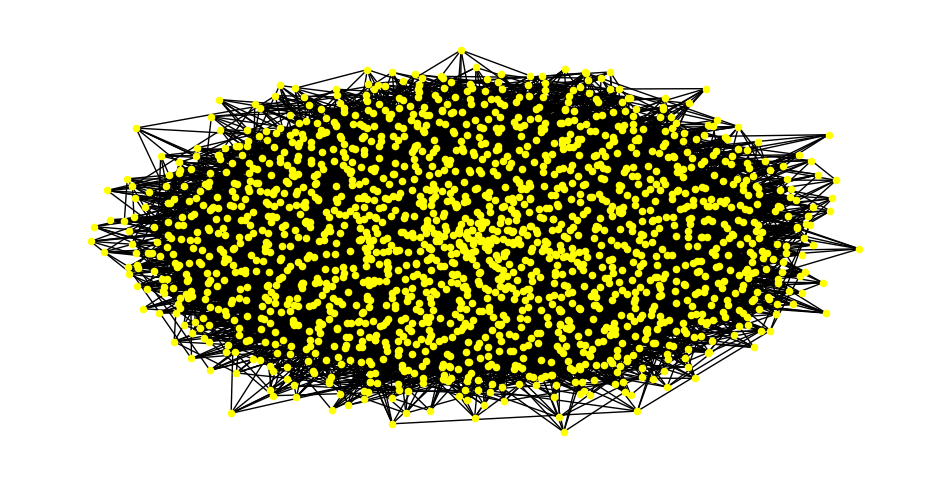

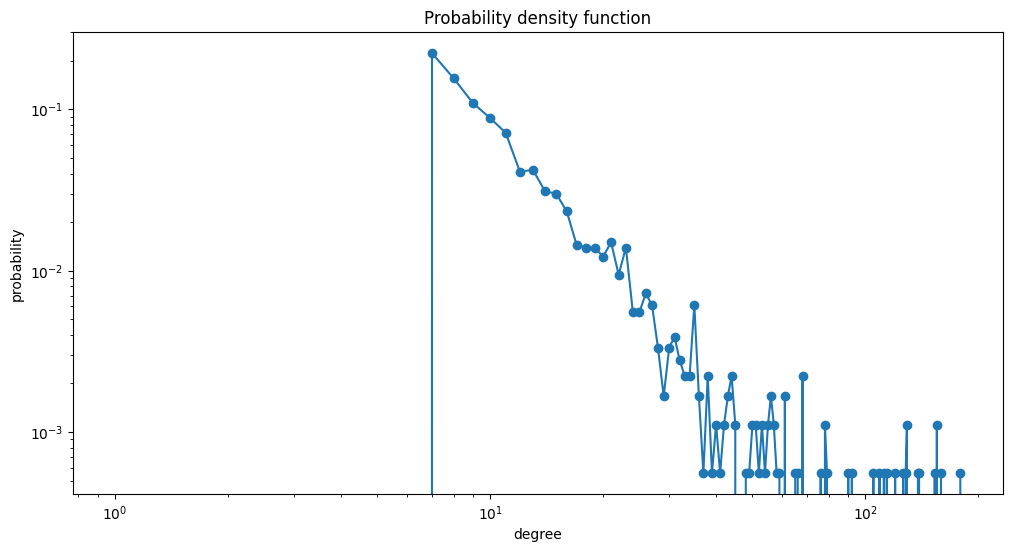

In [370]:
g2 = generate_preferential_attachment_graph(1800, 9, 7)
draw_graph(g2)
plot_degree_distribution(g2)

In [ ]:
The graphs are very different but still their degree distribution graphs have the same characteristics.
The second graph has a much more central appereance with nodes in the centar with a very high degree.
The degrees are much larger for the nodes added at the beginning resulting in a steeper drop in the degree distribution graph.



Under preferential attachment, the nodes that arrive at the beginning tend to have a larger degree. Let us test this. Generate a BA graph with 1000 nodes and plot in the X axis the node-id, and in the Y axis its degree.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to generate a BA graph of 1000 nodes, and then plot in the x axis the node-id and in the y axis the degree of each node. Remember to label both axes.</font>

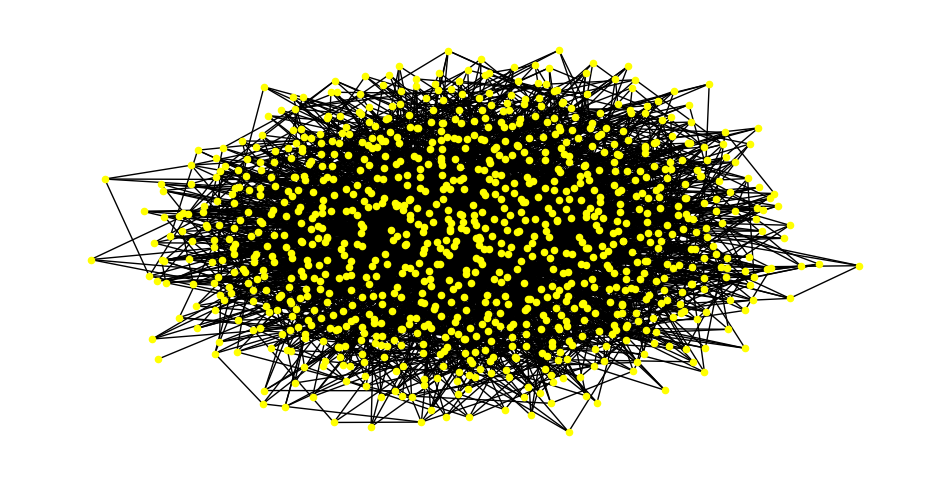

In [364]:
graph = generate_preferential_attachment_graph(1000, 7, 4)
draw_graph(graph)


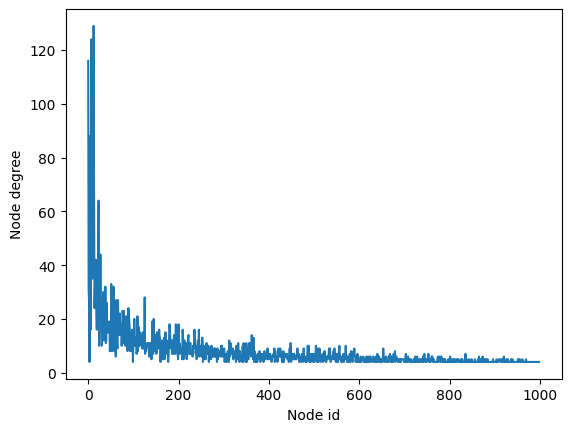

In [363]:
plt.xlabel("Node id")
plt.ylabel("Node degree")
x = list(range(len(graph.nodes)))
y = [graph.degree(u) for u in graph.nodes()]
plt.plot(x, y)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe on this plot.</font>

In [ ]:
In the plot I notice that the produced graph perfectly corresponds to the concept of a BA graph.
The sooner the node has been added to the graph the chance of its degree to explode increases.
Nodes with a smaller id have been added earlier and are longer present in the graph.

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/networks-science-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, in the case of the BA graphs add a line that approximates the power-law exponent that you observe in each of the two BA graphs. You can use Hill's estimator as described in the [Power law](https://en.wikipedia.org/wiki/Power_law#Maximum_likelihood) page of Wikipedia.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: fitting of power-law</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>